<a href="https://colab.research.google.com/github/mahalakruth/SAJRA/blob/main/twinkle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from transformers import pipeline

# Initialize the speech recognition pipeline
speech_recognition_pipeline = pipeline("automatic-speech-recognition", model="facebook/seamless-m4t-v2-large")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [2]:
# Provide the path to the audio file you want to transcribe
audio_file_path = "/content/story.mp3"

In [3]:
# Transcribe speech
transcription_result = speech_recognition_pipeline(audio_file_path)

transcription_result

You must either specify a `tgt_lang` or pass a correct `text_decoder_input_ids` to get
                a correct generation, otherwise the generation will probably make no sense.


{'text': 'There was a big forest, there was a big tree in the big forest, there were a lot of birds in the big tree, and the birds were all very happy.'}

In [4]:
# Access the transcribed text from the result
transcribed_text = transcription_result['text']
transcribed_text

'There was a big forest, there was a big tree in the big forest, there were a lot of birds in the big tree, and the birds were all very happy.'

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
import wave

In [6]:
import librosa

# Load audio file
audio_signal, sample_rate = librosa.load(audio_file_path, sr=None)


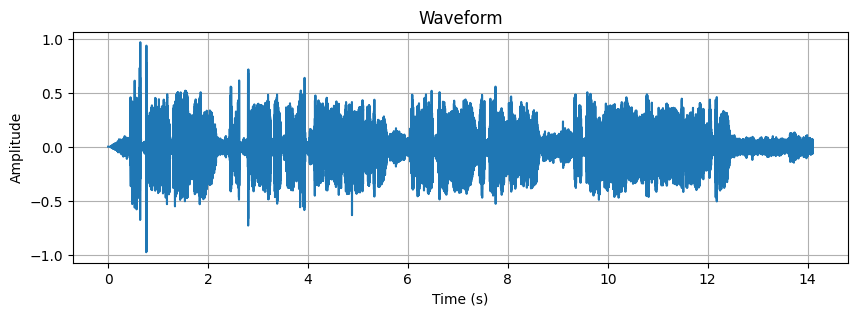

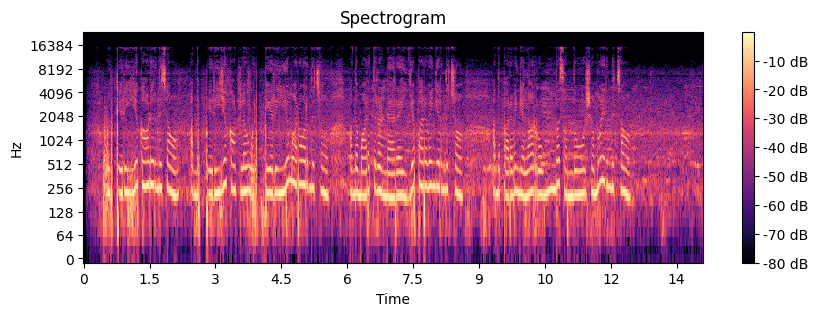

In [7]:
import soundfile as sf

# Load audio file
audio_signal, sample_rate = sf.read(audio_file_path)

# Get audio signal and sample rate
audio_signal, sample_rate = librosa.load(audio_file_path, sr=None)

# Plot waveform
plt.figure(figsize=(10, 3))
plt.plot(np.linspace(0, len(audio_signal) / sample_rate, num=len(audio_signal)), audio_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.grid()
plt.show()

# Plot spectrogram
plt.figure(figsize=(10, 3))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(audio_signal)), ref=np.max), sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


# Model Explanation


In the context of transformers library, there are primarily three components that you need to be familiar with: tokenizer, model, and pipeline.

1. Tokenizer:
   - The tokenizer is responsible for converting raw text input into numerical input that the model can understand.
   - It breaks down the text into tokens and converts these tokens into corresponding IDs based on the model's vocabulary.
   - Tokenizers may also perform additional tasks such as padding, truncating, and special token handling.
   - Tokenizers can be used independently of the model to preprocess text data.

2. Model:
   - The model is the neural network architecture that performs a specific task, such as text generation, text classification, or sequence-to-sequence translation.
   - For NLP tasks, models are often pre-trained on large text corpora and fine-tuned on task-specific data.
   - The model takes tokenized input as its input and produces output based on its architecture and task.

3. Pipeline:
   - The pipeline is a high-level API provided by the transformers library that allows you to perform various NLP tasks with minimal code.
   - It combines the tokenizer and model into a single object and provides a simple interface for performing common NLP tasks such as text generation, text classification, named entity recognition, and automatic speech recognition.
   - Pipelines handle tokenization, model inference, and post-processing automatically, making it easy to use pre-trained models for various tasks without needing to write extensive code.

In summary, the tokenizer is responsible for preprocessing text data, the model performs the main computation based on the input data, and the pipeline provides a convenient interface for using tokenizers and models together to perform common NLP tasks.

In [1]:
# Load model directly
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("facebook/seamless-m4t-v2-large")
model = AutoModel.from_pretrained("facebook/seamless-m4t-v2-large")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/usr/local/lib/python3.10/dist-packages/transformers/deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  w

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [2]:
print(tokenizer)

SeamlessM4TTokenizerFast(name_or_path='facebook/seamless-m4t-v2-large', vocab_size=256001, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'additional_special_tokens': ['__afr__', '__amh__', '__arb__', '__ary__', '__arz__', '__asm__', '__azj__', '__bel__', '__ben__', '__bos__', '__bul__', '__cat__', '__ceb__', '__ces__', '__ckb__', '__cmn__', '__cmn_Hant__', '__cym__', '__dan__', '__deu__', '__ell__', '__eng__', '__est__', '__eus__', '__fin__', '__fra__', '__fuv__', '__gaz__', '__gle__', '__glg__', '__guj__', '__heb__', '__hin__', '__hrv__', '__hun__', '__hye__', '__ibo__', '__ind__', '__isl__', '__ita__', '__jav__', '__jpn__', '__kan__', '__kat__', '__kaz__', '__khk__', '__khm__', '__kir__', '__kor__', '__lao__', '__lit__', '__lug__', '__luo__', '__lvs__', '__mai__', '__mal__', '__ma

In [3]:
print(model)

SeamlessM4Tv2Model(
  (shared): Embedding(256102, 1024, padding_idx=0)
  (text_encoder): SeamlessM4Tv2Encoder(
    (embed_tokens): Embedding(256102, 1024, padding_idx=0)
    (embed_positions): SeamlessM4Tv2SinusoidalPositionalEmbedding()
    (layers): ModuleList(
      (0-23): 24 x SeamlessM4Tv2EncoderLayer(
        (self_attn): SeamlessM4Tv2Attention(
          (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
          (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
          (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
          (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
        )
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (ffn): SeamlessM4Tv2FeedForwardNetwork(
          (fc1): Linear(in_features=1024, out_features=8192, bias=True)
          (fc2): Linear(in_features=8192, out_features=1024, bias=True)
